In [1]:
import sqlite3
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## 讀取資料

In [2]:
# 讀取 filtered_df 資料表
conn = sqlite3.connect("filtered_df.db")
df = pd.read_sql_query("SELECT * FROM filtered_df", conn)

# 轉換日期欄位格式
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")

# 篩選出最新日期的資料
latest_date = df["date"].max()
latest_df = df[df["date"] == latest_date]

## 描述性統計分析

In [3]:
# 計算描述性統計數據
desc_stats = df[["price", "score", "CP"]].describe().T
desc_stats["median"] = df[["price", "score", "CP"]].median()

# 顯示結果
print("=== 描述性統計分析 ===")
print(desc_stats)

=== 描述性統計分析 ===
         count          mean           std        min          25%  \
price  73044.0  20646.807500  16716.748909  888.00000  8790.000000   
score  73044.0   2932.085264   2300.821314  120.00000  1331.000000   
CP     73044.0      0.147462      0.066268    0.00327     0.110941   

                50%           75%            max        median  
price  14900.000000  26990.000000  128888.000000  14900.000000  
score   2405.000000   3862.000000   14480.000000   2405.000000  
CP         0.146041      0.178035       5.918919      0.146041  


## CP值最高的10筆資料

In [4]:
# 依照 CP 值排序取前10名
top_down = latest_df.sort_values(by="CP", ascending=False)
top_down.to_csv("Top CP VGA data.csv", index=False, encoding="utf-8-sig")
top_10_cp = top_down.head(10)
top_10_cp

,date,chipset,product,price,pure_chipset,score,CP
11,2025-11-18,AMD Radeon RX9060XT-8G,[雙11任搭]藍寶石 脈動 PULSE RX9060XT GAMING OC 8GB(329...,8888,AMD Radeon RX 9060 XT,3719.0,0.418429
36,2025-11-18,AMD Radeon RX9060XT-8G,撼訊 RX9060XT 8G-A 遊蕩者Reaper(3130MHz/22cm/雙風扇/三年...,9990,AMD Radeon RX 9060 XT,3719.0,0.372272
43,2025-11-18,AMD Radeon RX9060XT-8G,Acer Nitro RX9060XT OC 8GB(3320MHz/27cm/雙風扇/三年保固),9990,AMD Radeon RX 9060 XT,3719.0,0.372272
49,2025-11-18,AMD Radeon RX9070GRE-12G,藍寶石 脈動 PULSE RX9070GRE GAMING 12GB(2790MHz/28c...,16990,AMD Radeon RX 9070,6283.0,0.369806
93,2025-11-18,AMD Radeon RX9070GRE-12G,華擎 RX9070GRE Steel Legend Dark 12GB OC(2920MHz...,16990,AMD Radeon RX 9070,6283.0,0.369806
94,2025-11-18,AMD Radeon RX9070GRE-12G,撼訊 RX9070GRE 12G-L/OC Hellhound 暗黑犬(2860MHz/33...,16990,AMD Radeon RX 9070,6283.0,0.369806
100,2025-11-18,AMD Radeon RX9060XT-8G,華擎 RX9060XT Challenger 8GB OC(3290MHz/25cm/雙風扇...,10290,AMD Radeon RX 9060 XT,3719.0,0.361419
105,2025-11-18,INTEL Arc B580 顯示卡,Acer Nitro ARC B580 OC 12GB(2740MHz/27cm/雙風扇/註三年),8490,Intel Arc B580,3062.0,0.360660
122,2025-11-18,AMD Radeon RX9060XT-8G,Acer Nitro RX9060XT 8GB OC White(3320MHz/27cm/...,10490,AMD Radeon RX 9060 XT,3719.0,0.354528
186,2025-11-18,AMD Radeon RX9060XT-8G,藍寶石 脈動 PULSE RX9060XT GAMING OC 8GB(3290MHz/25...,10490,AMD Radeon RX 9060 XT,3719.0,0.354528


In [5]:
# 依照 CP 值倒數取前10名
lowest_cp_top10 = latest_df.sort_values(by="CP", ascending=True).head(10)
lowest_cp_top10

,date,chipset,product,price,pure_chipset,score,CP
45206,2025-11-18,NVIDIA RTX5080-16GB(GDDR7),華碩 ROG-ASTRAL-RTX5080-O16G-DHAHAB-CORE【燦金版】(27...,65990,NVIDIA GeForce RTX 5080,8762.0,0.132778
45197,2025-11-18,NVIDIA RTX5080-16GB(GDDR7),華碩 ROG-ASTRAL-RTX5080-O16G-MIKU-W (HATSUNE MIK...,65990,NVIDIA GeForce RTX 5080,8762.0,0.132778
42975,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),華碩 ROG-ASTRAL-RTX5090-O32G-BTF-GAMING(2610MHz/...,106990,NVIDIA GeForce RTX 5090,14480.0,0.135340
42495,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),華碩 ROG-ASTRAL-RTX5090-O32G-GAMING(2610MHz/36cm...,105990,NVIDIA GeForce RTX 5090,14480.0,0.136617
41663,2025-11-18,NVIDIA RTX5070Ti-16GB(GDDR7),華碩 ROG-STRIX-RTX5070TI-O16G-GAMING(2625MHz/33c...,37990,NVIDIA GeForce RTX 5070,5256.0,0.138352
41257,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),微星 RTX5090 32G SUPRIM LIQUID SOC(2580MHz/28cm/...,103990,NVIDIA GeForce RTX 5090,14480.0,0.139244
40235,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 XTREME WATERFORCE WB 32G(開放式水冷),102990,NVIDIA GeForce RTX 5090,14480.0,0.140596
40246,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 XTREME WATERFORCE 32G(水冷/註冊五年保),102990,NVIDIA GeForce RTX 5090,14480.0,0.140596
39364,2025-11-18,NVIDIA RTX5070Ti-16GB(GDDR7),華碩 PROART-RTX5070TI-O16G(2610MHz/31cm/三風扇/註五年),36990,NVIDIA GeForce RTX 5070,5256.0,0.142092
39370,2025-11-18,NVIDIA RTX5070Ti-16GB(GDDR7),華碩 TUF-RTX5070TI-O16G-BTF-WHITE(2610MHz/33cm/三...,36990,NVIDIA GeForce RTX 5070,5256.0,0.142092


In [6]:
# 設定圖表大小與字體
plt.rcParams["font.family"] = "Microsoft JhengHei"  # 或 "SimHei" / "標楷體" 等
plt.rcParams["font.size"] = 10

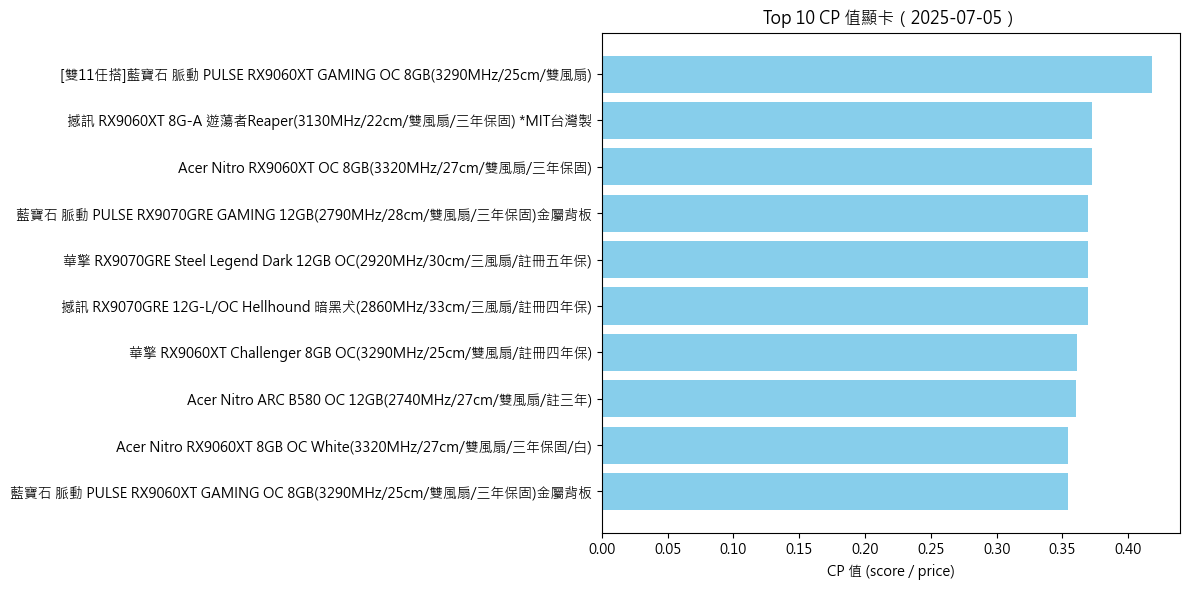

In [7]:
# 圖1: Top 10 顯卡的 CP 值長條圖
plt.figure(figsize=(12, 6))
plt.barh(top_10_cp["product"], top_10_cp["CP"], color='skyblue')
plt.xlabel("CP 值 (score / price)")
plt.title("Top 10 CP 值顯卡（2025-07-05）")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

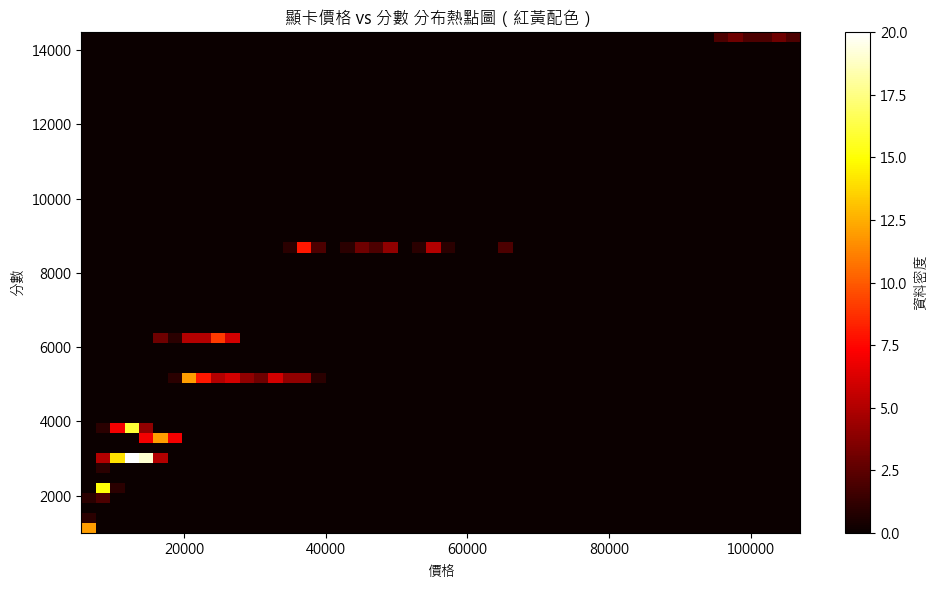

In [8]:
# 畫圖：使用 "hot" 配色的 2D 直方熱點圖
plt.figure(figsize=(10, 6))
plt.hist2d(
    latest_df["price"],
    latest_df["score"],
    bins=50,
    cmap="hot"
)
plt.colorbar(label="資料密度")
plt.title("顯卡價格 vs 分數 分布熱點圖（紅黃配色）")
plt.xlabel("價格")
plt.ylabel("分數")
plt.tight_layout()
plt.show()

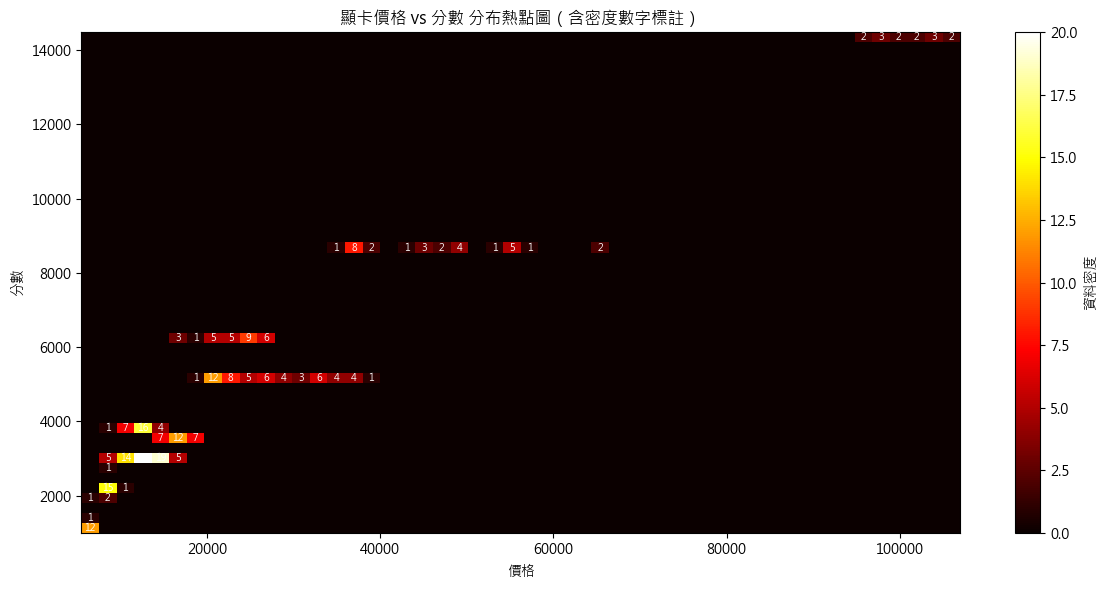

In [9]:
import numpy as np

# 建立 2D 直方圖並取得數值資料
plt.figure(figsize=(12, 6))
counts, xedges, yedges, im = plt.hist2d(
    latest_df["price"],
    latest_df["score"],
    bins=50,
    cmap="hot"
)

# 加上 colorbar
plt.colorbar(label="資料密度")

# 加上文字標註每個格子的 count 數量（只顯示非 0）
for i in range(len(xedges) - 1):
    for j in range(len(yedges) - 1):
        count = int(counts[i, j])
        if count > 0:
            plt.text(
                (xedges[i] + xedges[i+1]) / 2,
                (yedges[j] + yedges[j+1]) / 2,
                str(count),
                ha='center',
                va='center',
                fontsize=7,
                color='white'
            )

plt.title("顯卡價格 vs 分數 分布熱點圖（含密度數字標註）")
plt.xlabel("價格")
plt.ylabel("分數")
plt.tight_layout()
plt.show()

## 發現有離群值資料

In [10]:
# 依照價格排序取前10名
top_10_price = latest_df.sort_values(by="price", ascending=False).head(10)
top_10_price

,date,chipset,product,price,pure_chipset,score,CP
42975,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),華碩 ROG-ASTRAL-RTX5090-O32G-BTF-GAMING(2610MHz/...,106990,NVIDIA GeForce RTX 5090,14480.0,0.135340
42495,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),華碩 ROG-ASTRAL-RTX5090-O32G-GAMING(2610MHz/36cm...,105990,NVIDIA GeForce RTX 5090,14480.0,0.136617
41257,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),微星 RTX5090 32G SUPRIM LIQUID SOC(2580MHz/28cm/...,103990,NVIDIA GeForce RTX 5090,14480.0,0.139244
40246,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 XTREME WATERFORCE 32G(水冷/註冊五年保),102990,NVIDIA GeForce RTX 5090,14480.0,0.140596
40235,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 XTREME WATERFORCE WB 32G(開放式水冷),102990,NVIDIA GeForce RTX 5090,14480.0,0.140596
38353,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 MASTER ICE 32G(2655MHz/36cm/註...,100990,NVIDIA GeForce RTX 5090,14480.0,0.143381
38338,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 STEALTH ICE 32G(2655MHz/36cm/...,100990,NVIDIA GeForce RTX 5090,14480.0,0.143381
36447,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),技嘉 AORUS RTX5090 MASTER 32G(2655MHz/36cm/三風扇/註...,98990,NVIDIA GeForce RTX 5090,14480.0,0.146277
36452,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),微星 RTX5090 32G VANGUARD SOC(2527MHz/36cm/三風扇/註...,98990,NVIDIA GeForce RTX 5090,14480.0,0.146277
35756,2025-11-18,NVIDIA RTX5090-32GB(GDDR7),ZOTAC RTX5090 SOLID OC White Edition(2422MHz/3...,97990,NVIDIA GeForce RTX 5090,14480.0,0.147770


In [11]:
timeseries_df = df[df["score"].notna()].copy()

# 按日期統計平均價格、分數、CP值與樣本數
daily_stats = timeseries_df.groupby("date").agg(
    avg_price=("price", "mean"),
    avg_score=("score", "mean"),
    avg_cp=("CP", "mean"),
    count=("price", "count")
).reset_index()

In [12]:
daily_stats

,date,avg_price,avg_score,avg_cp,count
0,2020-01-05,14077.432836,1704.203980,0.127789,201
1,2020-01-07,14070.020000,1706.055000,0.128009,200
2,2020-01-09,14216.905941,1724.237624,0.128129,202
3,2020-01-10,14173.916256,1720.802956,0.128376,203
4,2020-01-12,14123.844221,1705.834171,0.128012,199
...,...,...,...,...,...
424,2025-10-10,25913.500000,5156.884615,0.230398,260
425,2025-10-12,25913.500000,5156.884615,0.230398,260
426,2025-11-06,25606.619565,5157.496377,0.231991,276
427,2025-11-16,24673.908759,5025.186131,0.233510,274


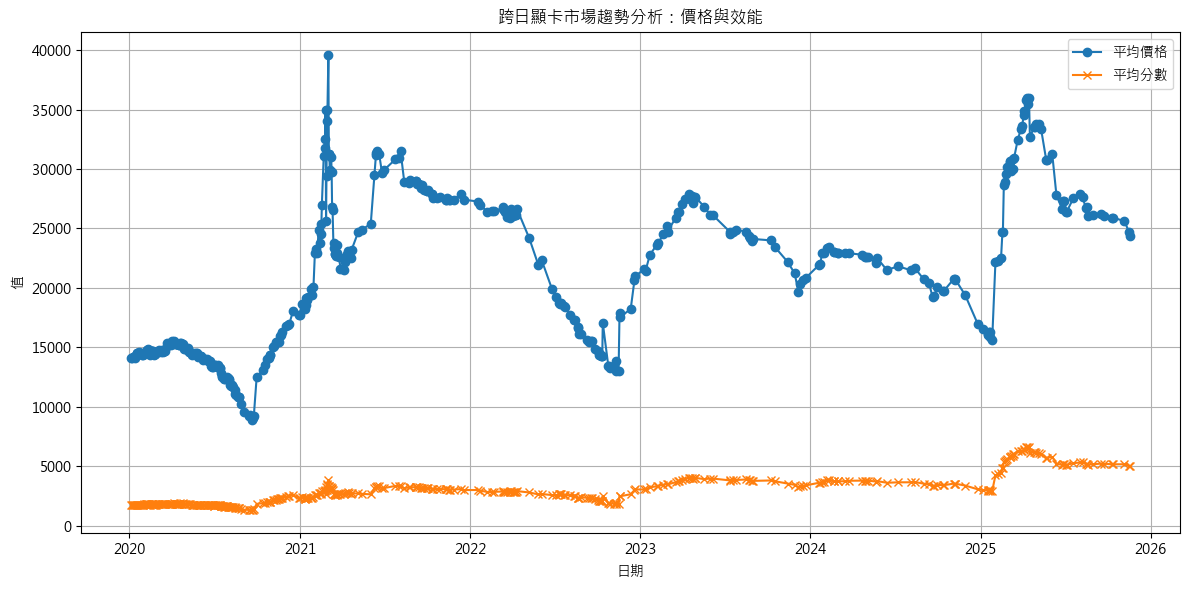

In [13]:
# 畫圖1：平均價格與分數
plt.figure(figsize=(12, 6))
plt.plot(daily_stats["date"], daily_stats["avg_price"], marker='o', label="平均價格")
plt.plot(daily_stats["date"], daily_stats["avg_score"], marker='x', label="平均分數")
plt.title("跨日顯卡市場趨勢分析：價格與效能")
plt.xlabel("日期")
plt.ylabel("值")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

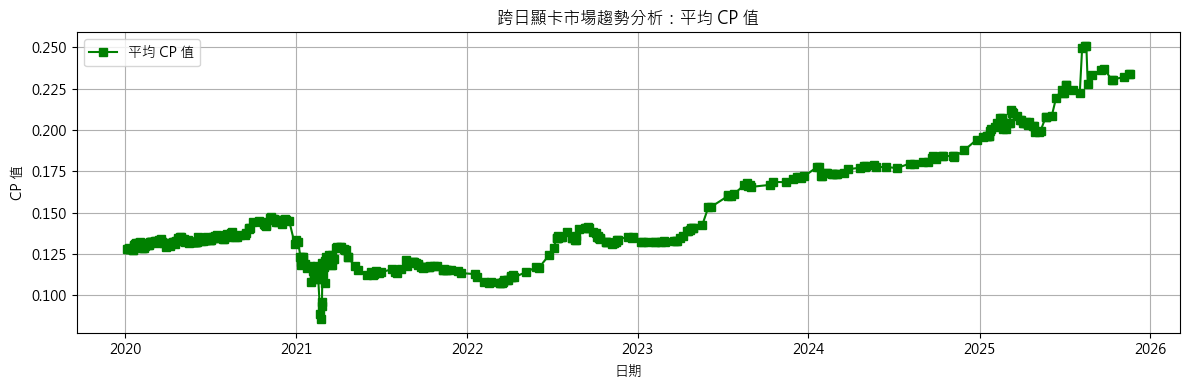

In [14]:
# 畫圖2：CP 值趨勢
plt.figure(figsize=(12, 4))
plt.plot(daily_stats["date"], daily_stats["avg_cp"], marker='s', color='green', label="平均 CP 值")
plt.title("跨日顯卡市場趨勢分析：平均 CP 值")
plt.xlabel("日期")
plt.ylabel("CP 值")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

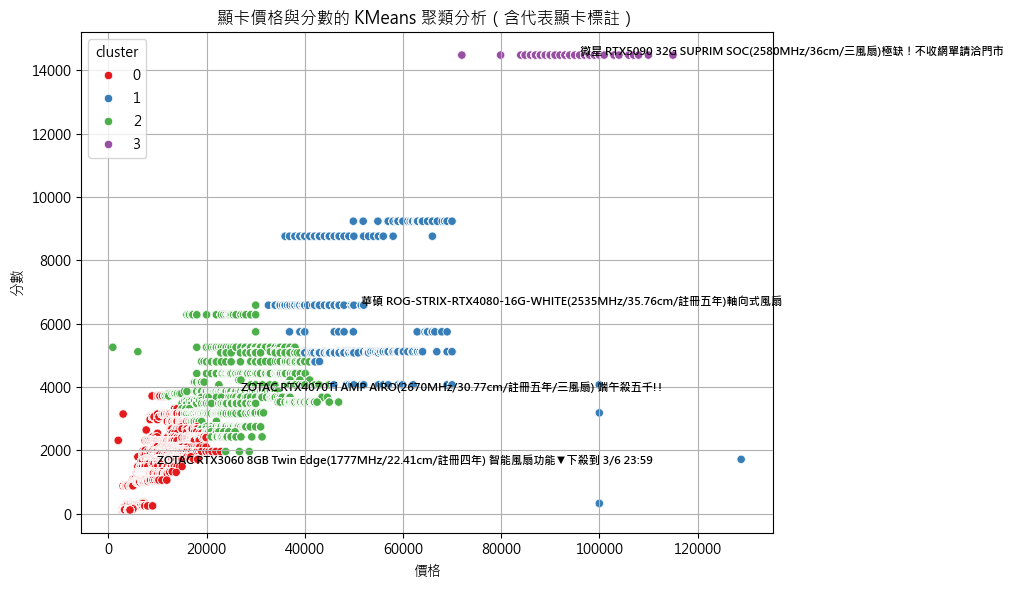

In [15]:
# 取出要聚類的欄位
clustering_df = df[["price", "score"]].copy()

# 標準化處理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_df)

# 建立並執行 KMeans 模型（分為 4 群）
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clustering_df["cluster"] = kmeans.fit_predict(scaled_data)

# 合併回原資料以取得名稱
df_with_cluster = df.copy()
df_with_cluster["cluster"] = clustering_df["cluster"]

# 找出每個群距離群中心最近的顯卡（代表顯卡）
centers = kmeans.cluster_centers_
rep_cards = []

for cluster_id in range(kmeans.n_clusters):
    cluster_points = scaled_data[clustering_df["cluster"] == cluster_id]
    center = centers[cluster_id]
    distances = np.linalg.norm(cluster_points - center, axis=1)
    min_idx = np.argmin(distances)
    
    # 找到在 df_with_cluster 中對應的那一筆
    rep_row = df_with_cluster[df_with_cluster["cluster"] == cluster_id].iloc[min_idx]
    rep_cards.append(rep_row)

# 畫圖
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clustering_df,
    x="price",
    y="score",
    hue="cluster",
    palette="Set1"
)

# 在圖上標註每群代表顯卡
for card in rep_cards:
    plt.text(
        card["price"], card["score"],
        card["product"],  # 如果想用 pure_chipset 改成 card["pure_chipset"]
        fontsize=8,
        weight="bold",
        color="black"
    )

plt.title("顯卡價格與分數的 KMeans 聚類分析（含代表顯卡標註）")
plt.xlabel("價格")
plt.ylabel("分數")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
conn.close()